In [127]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords

import csv
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re

from functools import reduce


import nltk

import itertools
words = set(nltk.corpus.words.words())

import plotly.express as px
import emoji
import spacy
import pyLDAvis

import collections

Loading BokehJS ...

In [128]:
df = pd.read_csv("./../artifacts/ifa-ie-beef-articles-clean.csv")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1 non-null      int64  
 1   text             1 non-null      object 
 2   clean_text       1 non-null      object 
 3   polarity_tokens  1 non-null      float64
 4   review_len       1 non-null      int64  
 5   word_count       1 non-null      int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 176.0+ bytes


In [129]:
df['polarity_tokens'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity_tokens',
    linecolor='black',
    yTitle='count',
    title='Token Polarity Distribution')

In [130]:
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [105]:
#df['clean_text']= df['clean_text'].values.astype('U')

In [106]:
#df3.to_csv('df3.csv', index = False)

In [131]:
# function to prepare n-grams
def count_ngrams(lines, min_length=2, max_length=4):
    lengths = range(min_length, max_length+1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen = max_length)
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current)>= length:
                ngrams[length][current[:length]] +=1
    for line in lines:
        for word in nltk.word_tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

In [132]:
def print_most_freq_ng(ngrams, num=2222):
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [133]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----2222 most frequent 2-grams ----
steer heifer: 329
price report: 328
brendan golden: 312
livestock chairman: 302
young bull: 284
beef price: 266
angus wood: 258
golden say: 251
ifa president: 249
bull cow: 239
joe healy: 234
steer base: 227
bonus month: 211
cattle price: 206
ifa livestock: 202
wood say: 200
say ifa: 190
spec bonus: 188
ifa national: 188
base heifer: 184
healy say: 178
bord bia: 176
beef farmer: 168
national livestock: 168
food kepak: 160
report dafm: 158
live export: 158
cow spec: 158
dafm week: 156
insist payment: 152
pay ifa: 151
payment day: 151
irish price: 149
quote pay: 149
ifa member: 149
day cattle: 149
factory base: 148
chairman brendan: 146
base quote: 146
farmer insist: 143
minister creed: 143
high deal: 140
report quote: 140
base price: 133
department agriculture: 129
price update: 122
tim cullinan: 120
irish beef: 120
say farmer: 114
official price: 112
president joe: 111
grade fat: 107
fat class: 107
meet spec: 107
spec criterion: 107
heifer cow: 107
m

direct support: 12
remainder year: 12
american beef: 12
fit lamb: 12
suckler farm: 12
total slaughter: 12
say steer: 12
update hogget: 12
processing sector: 12
sub standard: 12
ifa highlight: 12
double standard: 12
ifa hold: 12
say brexit: 12
heifers bulls: 12
brexit fund: 12
agri food: 12
figure official: 12
deadweight cattle: 12
price animal: 12
help farmer: 12
irish steer: 12
vat average: 12
germany france: 12
spain austria: 12
procurement manager: 12
datum show: 12
market disturbance: 12
heifers young: 12
distribution centre: 12
say essential: 12
high standard: 11
strength market: 11
live sheep: 11
farmer continue: 11
farm organisation: 11
say current: 11
heifer make: 11
price available: 11
price remain: 11
demand irish: 11
ifa raise: 11
current market: 11
heifers high: 11
lucrative christmas: 11
european beef: 11
health welfare: 11
market increase: 11
trade continue: 11
lamb lamb: 11
market return: 11
say suckler: 11
pay base: 11
head compare: 11
available farmer: 11
remain tight:

cap funding: 6
tight factory: 6
forward store: 6
export date: 6
lamb move: 6
suitable lamb: 6
active mart: 6
trade factory: 6
market situation: 6
trade perform: 6
control farmer: 6
rural economy: 6
brazilian authority: 6
number say: 6
cattle move: 6
place irish: 6
standard impose: 6
bia quality: 6
requirement farmer: 6
scheme include: 6
agriculture beef: 6
beef main: 6
mart provide: 6
restrictive condition: 6
minister department: 6
year number: 6
end year: 6
strong competition: 6
say significant: 6
trade provide: 6
cost say: 6
increase live: 6
increase volume: 6
golden remind: 6
meet reduction: 6
day say: 6
allow farmer: 6
standard irish: 6
say hogget: 6
retail level: 6
factor include: 6
lack competition: 6
income pressure: 6
beef processing: 6
irish cattle: 6
head cattle: 6
tight steer: 6
golden welcome: 6
ifa contact: 6
sell animal: 6
volume value: 6
demand ewe: 6
factory return: 6
sector beef: 6
strong bull: 6
price food: 6
quality grade: 6
number cattle: 6
value irish: 6
pay factor

issue beef: 5
ifa determined: 5
action minister: 5
dairy sector: 5
anger farmer: 5
sector need: 5
cost loan: 5
import fail: 5
import meet: 5
government support: 5
unsustainable discounting: 5
fianna fail: 5
beef enterprise: 5
urgent meeting: 5
friday say: 5
aldi lidl: 5
profit margin: 5
ifa morning: 5
farmer get: 5
insult farmer: 5
farmer campaign: 5
request ifa: 5
legal threat: 5
beef environmental: 5
environmental efficiency: 5
efficiency pilot: 5
extend closing: 5
meat dawn: 5
christine tacon: 5
market transparency: 5
environment chairman: 5
week angus: 5
agreement include: 5
age limit: 5
say angus: 5
head head: 5
limit restriction: 5
agriculture commission: 5
president bolsonaro: 5
football pitch: 5
mart eligible: 5
compound feed: 5
standard producer: 5
grade ifa: 5
farming sector: 5
highlight brazilian: 5
brazilian competent: 5
competent authority: 5
give brazilian: 5
turn blind: 5
blind eye: 5
factory stop: 5
undermine confidence: 5
aim system: 5
standard traceability: 5
brazilia

sheep update ifa: 31
deal group large: 31
live export trade: 31
dafm meat market: 31
meat market report: 31
minister michael creed: 31
beef update ifa: 30
base heifer high: 30
euro price recent: 30
recent week deadweight: 30
week deadweight excl: 30
deadweight excl vat: 30
excl vat country: 30
changey veal veal: 29
veal veal official: 29
vat country steer: 29
high deal group: 29
factory pay quote: 29
steer heifer young: 29
steer heifer bull: 29
equivalent incl vat: 29
sheep chairman sean: 28
spring light official: 28
prev yrnational avg: 28
ifa member strong: 28
lot young bull: 28
ewe supply figure: 28
dafm week animalfigurechangeytdytd: 28
week animalfigurechangeytdytd changelamb: 28
prev official price: 27
steer base heifers: 27
animalfigurechangeytdytd changelamb spring: 27
dawn ballyhauni foyle: 27
ballyhauni foyle meat: 27
update ifa livestock: 26
bord bia sheep: 26
ifa sheep chairman: 26
say brendan golden: 26
irish beef farmer: 26
increase breed bonus: 26
say ifa national: 26
sa

increase cattle price: 7
price key market: 7
demand sell ewe: 7
current market condition: 7
weight high deal: 7
export northern ireland: 7
positive market condition: 7
price factory pay: 7
ifa livestock committee: 7
member price rise: 7
tight demand strong: 7
strong bulls cow: 7
beef task force: 7
opening food service: 7
cow make grade: 7
closure food service: 7
changey veal official: 7
brexit adjustment reserve: 7
cullinan say ifa: 7
beef price cut: 7
bull cow supply: 7
lamb price week: 7
direct support suckler: 7
suckler farmer say: 7
safety animal health: 7
stand head october: 7
head october select: 7
october select sell: 7
beef sector say: 7
bull cow week: 7
farmer incur loss: 7
factory demand spec: 7
unchanged steer heifer: 7
brazil fail meet: 7
export week commencing: 7
week commencing live: 7
commencing live export: 7
ifa pursue dafm: 7
pursue dafm publish: 7
dafm publish statistic: 7
slaughter week steer: 7
finisher payment scheme: 7
lamb price lamb: 7
compare decrease official

incl ifa livestock: 4
scheme brendan golden: 4
farmer sell move: 4
factory demand strong: 4
supply chain say: 4
supply remain tight: 4
lot ewe supply: 4
say ifa contact: 4
member offer eft: 4
market demand say: 4
lamb cull ewe: 4
increase demand beef: 4
lamb make deal: 4
bull cow ifa: 4
value irish beef: 4
farmer say brendan: 4
apply scheme suckler: 4
scheme suckler farmer: 4
cow calf pair: 4
update hogget high: 4
hogget high deal: 4
demand beef market: 4
immediate price increase: 4
office food ombudsman: 4
south american country: 4
strong performance beef: 4
performance beef supermarket: 4
pay young bull: 4
cullinan say minister: 4
task force meeting: 4
beef price market: 4
market condition justify: 4
industry representative body: 4
brexit beef farmer: 4
brexit adjustment fund: 4
sub standard beef: 4
family farm income: 4
farmer receive payment: 4
target payment suckler: 4
standard impose irish: 4
farmer say price: 4
supply tight market: 4
reject low quote: 4
equivalent irish price: 4

steer heifer farmer: 3
lag market return: 3
golden say favourable: 3
strengthen market condition: 3
say market demand: 3
past week say: 3
factory offer deal: 3
price prime irish: 3
key market strengthen: 3
market strengthen past: 3
increase come week: 3
predict few cattle: 3
demand strong supply: 3
strong supply figure: 3
continue rise factory: 3
secure supply meet: 3
say farmer face: 3
continual increase production: 3
price ifa livestock: 3
return high price: 3
ifa set clear: 3
set clear demand: 3
clear demand suckler: 3
demand suckler cow: 3
cow payment animal: 3
payment animal payment: 3
animal payment cattle: 3
payment cattle rear: 3
finish farmer ensure: 3
farmer ensure cap: 3
ensure cap monie: 3
cap monie support: 3
monie support irish: 3
beef high welfare: 3
high welfare environmental: 3
welfare environmental standard: 3
environmental standard world: 3
standard world minister: 3
beef production system: 3
strategic plan include: 3
payment farmer rear: 3
farmer rear finish: 3
prop

ifa member favourable: 3
member favourable market: 3
market condition steer: 3
condition steer base: 3
star female animal: 3
disruption cause control: 3
brand control farmer: 3
status irish grass: 3
irish grass fed: 3
cattle export northern: 3
mart provide essential: 3
provide essential service: 3
essential service farmer: 3
service farmer agricultural: 3
farmer agricultural community: 3
open transparent market: 3
transparent market price: 3
market price competition: 3
price competition security: 3
competition security payment: 3
agriculture food marine: 3
meeting ifa national: 3
irish beef production: 3
slaughter northern ireland: 3
price unchanged week: 3
cow price remain: 3
price remain unchanged: 3
ifa rural development: 3
rural development chairman: 3
agriculture commissioner janusz: 3
commissioner janusz wojciechowski: 3
anc payment rollout: 3
payment rollout anc: 3
rollout anc payment: 3
anc payment farmer: 3
payment farmer commence: 3
farmer commence week: 3
commence week payme

day cattle price report: 9
high deal large specialist: 9
deal large specialist lot: 9
say ifa president say: 9
bull cow price report: 9
cow price report quote: 9
price animal euro change: 9
animal euro change prev: 9
source dafm average price: 9
ballyhauni foyle meat include: 9
foyle meat include ashbourne: 9
meat include ashbourne meat: 9
include ashbourne meat meadowmeat: 9
incl vat heifers bulls: 9
official cattle price report: 9
ahbd report cattle price: 9
austria italy poland steer: 9
italy poland steer price: 9
poland steer price ireland: 9
wood say cattle price: 9
say agriculture minister michael: 9
angus wood say minister: 9
support direct aid farmer: 9
dafm week animalfigurechangeytd lambs: 8
week animalfigurechangeytd lambs spring: 8
demand factory pay quote: 8
live sheep export source: 8
sheep export source bord: 8
bully bullcowp price incl: 8
bullcowp price incl euro: 8
price incl euro price: 8
seasonchange price incl total: 8
price incl total live: 8
incl total live sheep:

high deal available group: 5
brendan golden say late: 5
cattle rear finish farmer: 5
convergence criss eco scheme: 5
bully bullcowp price euro: 5
bullcowp price euro price: 5
price euro price recent: 5
price update lamb weight: 5
lamb weight high deal: 5
farmer ifa livestock chairman: 5
factory pay base price: 5
group large lot good: 5
large lot good demand: 5
lot good demand sell: 5
lamb fit lamb price: 5
seasonchange price source bord: 5
price source bord bia: 5
price strengthen past week: 5
dafm week prev prev: 5
golden say farmer sell: 5
apply new reference period: 5
ifa national sheep committee: 5
national sheep committee chairman: 5
dennehy say hogget make: 5
price update hogget spring: 5
update hogget spring lamb: 5
payment day cattle steer: 5
chairman brendan golden welcome: 5
meat industry ireland mii: 5
price food service sector: 5
deal young bull cow: 5
pay ifa member supply: 5
ifa member supply tight: 5
export market remain strong: 5
yravg factory mart avg: 5
factory mart a

assist live export trade: 4
week strong factory demand: 4
main export market remain: 4
week ifa livestock chairman: 3
dennehy say market condition: 3
service sector increase demand: 3
cow price range grade: 3
export benchmark price show: 3
finisher brendan golden say: 3
say price increase week: 3
dennehy say lamb price: 3
available large lot group: 3
cull ewe make say: 3
meet strong resistance farmer: 3
ifa member price strong: 3
electronic fund transfer eft: 3
price update lamb pay: 3
pay high deal group: 3
animalfigurechangeytd lambs spring ewe: 3
lambs spring ewe light: 3
farm ballyhaunis incl spec: 3
ballyhaunis incl spec cattle: 3
incl spec cattle meat: 3
spec cattle meat incl: 3
cattle meat incl farmer: 3
price reflect strength market: 3
range depend grade young: 3
depend grade young bull: 3
young bull grade make: 3
export benchmark price factory: 3
return value current market: 3
farmer beef price update: 3
say sean dennehy say: 3
bord bia ifa livestock: 3
bia ifa livestock chair

measure need safeguard irish: 3
need safeguard irish european: 3
safeguard irish european agriculture: 3
maintain close possible trading: 3
possible trading relationship single: 3
trading relationship single market: 3
relationship single market essential: 3
single market essential maintain: 3
market essential maintain level: 3
essential maintain level playing: 3
maintain level playing field: 3
level playing field correspond: 3
playing field correspond standard: 3
field correspond standard food: 3
correspond standard food safety: 3
standard food safety animal: 3
delay control good sanitary: 3
control good sanitary phytosanitary: 3
good sanitary phytosanitary inspection: 3
sanitary phytosanitary inspection veterinary: 3
phytosanitary inspection veterinary certificate: 3
inspection veterinary certificate lead: 3
veterinary certificate lead delay: 3
certificate lead delay border: 3
lead delay border increase: 3
delay border increase cost: 3
market tariff free quota: 3
tariff free quota fre

beef package target farmer: 3
package target farmer need: 3
account farmer incur beef: 3
farmer incur beef price: 3
incur beef price loss: 3
beef price loss income: 3
price loss income situation: 3
finish cattle september suckler: 3
cattle september suckler producer: 3
september suckler producer group: 3
suckler producer group hit: 3
producer group hit hard: 3
healy say ifa hold: 3
livestock leader say department: 3
beef farmer major bill: 3
farmer major bill pay: 3
beef price cut beef: 3
price cut beef farmer: 3
chairman angus wood call: 3
angus wood say week: 3
factory price report quote: 3
income joe healy say: 3
agriculture michael creed government: 3
livestock leader say easy: 3
angus wood accuse factory: 3
livestock leader say cattle: 3
angus wood encourage suckler: 3
wood encourage suckler farmer: 3
new cow beep beef: 3
cow beep beef environmental: 3
department agriculture angus wood: 3
agriculture angus wood say: 3
say ifa fight hard: 3
ifa fight hard campaign: 3
fight hard cam

In [134]:
bigramtodf = pd.DataFrame({'2-grams': [], '2-grams freq': []})
trigramtodf = pd.DataFrame({'3-grams': [], '3-grams freq': []})
quadgramtodf = pd.DataFrame({'4-grams': [], '4-grams freq': []})

In [135]:
def print_most_freq_ng(ngrams, num=2222):
    global bigramtodf, trigramtodf, quadgramtodf
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
            if n == 2:
                bigramtodf = bigramtodf.append({'2-grams': gram, '2-grams freq': count}, ignore_index=True)
            elif n == 3:
                trigramtodf = trigramtodf.append({'3-grams': gram, '3-grams freq': count}, ignore_index=True)
            else:
                quadgramtodf = quadgramtodf.append({'4-grams': gram, '4-grams freq': count}, ignore_index=True)
        print('')

In [136]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----2222 most frequent 2-grams ----
steer heifer: 329
price report: 328
brendan golden: 312
livestock chairman: 302
young bull: 284
beef price: 266
angus wood: 258
golden say: 251
ifa president: 249
bull cow: 239
joe healy: 234
steer base: 227
bonus month: 211
cattle price: 206
ifa livestock: 202
wood say: 200
say ifa: 190
spec bonus: 188
ifa national: 188
base heifer: 184
healy say: 178
bord bia: 176
beef farmer: 168
national livestock: 168
food kepak: 160
report dafm: 158
live export: 158
cow spec: 158
dafm week: 156
insist payment: 152
pay ifa: 151
payment day: 151
irish price: 149
quote pay: 149
ifa member: 149
day cattle: 149
factory base: 148
chairman brendan: 146
base quote: 146
farmer insist: 143
minister creed: 143
high deal: 140
report quote: 140
base price: 133
department agriculture: 129
price update: 122
tim cullinan: 120
irish beef: 120
say farmer: 114
official price: 112
president joe: 111
grade fat: 107
fat class: 107
meet spec: 107
spec criterion: 107
heifer cow: 107
m

cow suckler: 15
price euro: 15
cow make: 15
term condition: 15
report commission: 15
brexit uncertainty: 15
say time: 15
dafm weekly: 15
weekly beef: 15
beef slaughter: 15
sheep price: 15
trade total: 15
export stand: 15
stand head: 15
dairy farmer: 15
farmer pay: 15
creed government: 15
direct aid: 15
bullcowp incl: 14
ifa work: 14
price key: 14
average price: 14
ewe make: 14
week price: 14
sheep committee: 14
ballyhaunis incl: 14
winter finisher: 14
maximise return: 14
say strong: 14
number week: 14
rear finish: 14
condition beef: 14
supply strong: 14
support direct: 14
payment suckler: 14
condition strong: 14
beef cattle: 14
say week: 14
cattle steer: 14
market access: 14
target payment: 14
price irish: 14
deadweight sheep: 14
tom phelan: 14
farmer incur: 14
national council: 14
export compare: 14
agriculture commissioner: 14
target direct: 14
ifa clear: 14
today ifa: 14
ifa demand: 14
incl change: 13
cattle trade: 13
irish farming: 13
sheep farmer: 13
irish composite: 13
bullcowp p

increase funding: 8
date supply: 8
report official: 8
bia lamb: 8
government ensure: 8
agriculture committee: 8
payment say: 8
socio economic: 8
cullinan welcome: 8
demand spec: 8
kill change: 8
total year: 8
animal gbp: 8
gbp change: 8
week euro: 8
euro steer: 8
steer steer: 8
heifer heifer: 8
bull bull: 8
cow source: 8
price ahdb: 8
sheep market: 8
sheep year: 8
week gbp: 8
gbp euro: 8
euro lamb: 8
lamb source: 8
government guideline: 8
security payment: 8
ifa write: 8
taskforce meeting: 8
brazil fail: 8
price cost: 8
week commencing: 8
publish statistic: 8
statistic lamb: 8
import ireland: 8
mart include: 8
cow fight: 8
fight price: 8
beef late: 8
average steer: 8
feed standard: 8
slaughtering head: 8
price ahbd: 8
end august: 8
farmer application: 8
farmer eligible: 8
aim datum: 8
cow remainder: 8
producer organisation: 8
fed standard: 8
june steer: 8
brussels week: 8
factory own: 8
own cattle: 8
apply finish: 8
steer equivalent: 8
package beef: 8
brexit relate: 8
support beef: 8
l

cow beep: 6
beef producer: 6
national farm: 6
climate action: 6
rise farmer: 6
farmer joe: 6
healy welcome: 6
goodman abp: 6
setting friday: 6
price setting: 6
severe income: 6
irish livestock: 6
bonus steer: 6
wood encourage: 6
wood point: 6
income farmer: 6
tds senator: 6
additional support: 6
environmental labour: 6
cut beef: 6
beef loss: 6
food wise: 6
secure additional: 6
check week: 6
show average: 6
factory cut: 6
teagasc national: 6
meat additional: 6
bonus ashbourne: 6
pay cattle: 6
factory country: 6
demand cow: 5
past year: 5
say change: 5
irish export: 5
access market: 5
standard ifa: 5
continue action: 5
single market: 5
raw material: 5
corresponding week: 5
supply run: 5
incl week: 5
week heifer: 5
remain steady: 5
lamb available: 5
sell strong: 5
factory attempt: 5
period say: 5
farmer see: 5
member ifa: 5
past day: 5
kill drop: 5
range depend: 5
value current: 5
scheme provide: 5
new entrant: 5
price supply: 5
welfare environmental: 5
need act: 5
farm family: 5
increase

number finished: 4
christmas order: 4
farmer experience: 4
strengthen supply: 4
sheep ifa: 4
lamb trade: 4
drive strong: 4
sale factory: 4
number lamb: 4
lamb come: 4
grade brendan: 4
farmer strong: 4
demand base: 4
say teagasc: 4
stand firm: 4
price pace: 4
lamb say: 4
ewe strong: 4
past number: 4
increase come: 4
slaughter year: 4
struggle match: 4
match supply: 4
trade strengthen: 4
period brendan: 4
reduce number: 4
number suitable: 4
payment cattle: 4
beef high: 4
funding level: 4
finish scheme: 4
farmer farmer: 4
farmer lose: 4
include scheme: 4
scheme deliver: 4
farmer rear: 4
cattle brendan: 4
proposal suckler: 4
provide funding: 4
announce week: 4
farmer leave: 4
member demand: 4
production year: 4
price compare: 4
rest year: 4
come year: 4
fit sell: 4
sell positive: 4
cattle market: 4
make lamb: 4
year brendan: 4
lamb strong: 4
condition key: 4
price exclude: 4
strong live: 4
cattle northern: 4
ireland date: 4
farmer favourable: 4
favour farmer: 4
golden criticise: 4
micheál 

deal large lot: 32
week incl prev: 32
cattle ifa president: 32
say ifa president: 32
change prev week: 32
sheep update ifa: 31
deal group large: 31
live export trade: 31
dafm meat market: 31
meat market report: 31
minister michael creed: 31
beef update ifa: 30
base heifer high: 30
euro price recent: 30
recent week deadweight: 30
week deadweight excl: 30
deadweight excl vat: 30
excl vat country: 30
changey veal veal: 29
veal veal official: 29
vat country steer: 29
high deal group: 29
factory pay quote: 29
steer heifer young: 29
steer heifer bull: 29
equivalent incl vat: 29
sheep chairman sean: 28
spring light official: 28
prev yrnational avg: 28
ifa member strong: 28
lot young bull: 28
ewe supply figure: 28
dafm week animalfigurechangeytdytd: 28
week animalfigurechangeytdytd changelamb: 28
prev official price: 27
steer base heifers: 27
animalfigurechangeytdytd changelamb spring: 27
dawn ballyhauni foyle: 27
ballyhauni foyle meat: 27
update ifa livestock: 26
bord bia sheep: 26
ifa sheep 

price rise steer: 8
rise steer base: 8
farmer apply new: 8
say bord bia: 8
market strong bulls: 8
cattle steer base: 8
welcome announcement minister: 8
golden encourage farmer: 8
encourage farmer apply: 8
food safety animal: 8
year date supply: 8
date supply figure: 8
market report official: 8
bord bia lamb: 8
heifer cow week: 8
national dairy chairman: 8
tim cullinan welcome: 8
demand spec cattle: 8
number total kill: 8
total kill change: 8
kill change prev: 8
prev week steer: 8
cow total year: 8
total year date: 8
official price animal: 8
prev week animal: 8
week animal gbp: 8
animal gbp change: 8
gbp change prev: 8
prev week euro: 8
week euro steer: 8
euro steer steer: 8
steer steer heifer: 8
steer heifer heifer: 8
heifer heifer bull: 8
heifer bull bull: 8
bull bull cow: 8
bull cow cow: 8
cow cow source: 8
cow source dafm: 8
average price ahdb: 8
price ahdb deadweight: 8
sheep market update: 8
animal number change: 8
number change prev: 8
prev week change: 8
week change week: 8
chan

bull cow beef: 5
apply new reference: 5
heifer make factory: 5
total sheep process: 5
start grade move: 5
national sheep committee: 5
say hogget make: 5
update hogget spring: 5
hogget spring lamb: 5
day cattle steer: 5
announcement minister agriculture: 5
industry ireland mii: 5
farmer sell animal: 5
beef price farmer: 5
demand strong price: 5
gap prime export: 5
price food service: 5
deal young bull: 5
value market place: 5
farmer apply beep: 5
price rise strong: 5
key market beef: 5
say farmer demand: 5
price bord bia: 5
market say beef: 5
impose irish farmer: 5
beef supply chain: 5
double standard apply: 5
new beep scheme: 5
ifa meet senior: 5
bullcowp incl sheep: 5
beef suckler farm: 5
low quote price: 5
drive tight supply: 5
ifa member supply: 5
member supply tight: 5
export market remain: 5
market remain strong: 5
demand remain strong: 5
term condition scheme: 5
yravg factory mart: 5
factory mart avg: 5
vat inclusive equivalent: 5
demand price steer: 5
factory demand steer: 5
ins

beef finisher endure: 4
finisher endure brexit: 4
endure brexit disruption: 4
bia sheep market: 4
meet requirement farmer: 4
update october steer: 4
october steer heifer: 4
say meat factory: 4
limited number buyer: 4
suckler base brand: 4
grass fed beef: 4
application ifa president: 4
tim cullinan acknowledge: 4
lamb producer group: 4
say ifa support: 4
export market equivalent: 4
compare time year: 4
cow price unchanged: 4
week commence live: 4
commence live export: 4
compare sheep market: 4
lamb fit import: 4
fit import lamb: 4
import lamb ifa: 4
price update september: 4
mart country wear: 4
country wear face: 4
wear face covering: 4
face covering mandatory: 4
covering mandatory mart: 4
cow fight price: 4
steer price incl: 4
price incl vat: 4
report commission young: 4
export week end: 4
create dedicated step: 4
dedicated step step: 4
sheep process irish: 4
process irish export: 4
irish export plant: 4
price price report: 4
average ireland germany: 4
ireland germany france: 4
cattle

payment farmer rear: 3
farmer rear finish: 3
proposal suckler beef: 3
direct payment family: 3
new suckler cow: 3
cap strategic plan: 3
say supply finished: 3
grade grade cow: 3
kill date year: 3
few cattle available: 3
irish beef key: 3
price rise past: 3
rise past week: 3
composite price compare: 3
price say ifa: 3
demand strong factory: 3
say farmer continue: 3
week base price: 3
price available large: 3
factory agent remain: 3
agent remain active: 3
trade factory agent: 3
ewe make lamb: 3
make lamb price: 3
large lot sell: 3
lot sell ewe: 3
strong farmer resistance: 3
price steer week: 3
supply cattle remainder: 3
cattle remainder year: 3
year predict bord: 3
predict bord bia: 3
bord bia head: 3
bia head compare: 3
reflect favourable market: 3
make beef price: 3
say demand lamb: 3
number suitable lamb: 3
farmer sell positive: 3
return lamb price: 3
member factory pay: 3
pay quote demand: 3
quote demand strong: 3
strength market condition: 3
market condition key: 3
price exclude vat

president say michel: 3
say michel barnier: 3
michel barnier team: 3
barnier team continue: 3
team continue pursue: 3
continue pursue outcome: 3
pursue outcome retain: 3
outcome retain close: 3
retain close possible: 3
intense discussion secure: 3
discussion secure deal: 3
secure deal continue: 3
deal continue prepare: 3
continue prepare post: 3
prepare post brexit: 3
post brexit scenario: 3
brexit scenario regard: 3
scenario regard irish: 3
regard irish government: 3
government ensure irish: 3
irish farmer queue: 3
farmer queue brexit: 3
queue brexit fund: 3
meeting ifa president: 3
spec cattle strong: 3
cattle strong market: 3
number steer base: 3
strong cattle price: 3
update november steer: 3
november steer heifer: 3
previous source dafm: 3
lamb fit steer: 3
fit steer heifer: 3
price premium farmer: 3
farmer control monitoring: 3
department bord bia: 3
bord bia develop: 3
reference travel time: 3
standard bord bia: 3
impact price pay: 3
bull meet grass: 3
application ifa livestock:

meat meadowmeat rathdowney foyle: 36
meadowmeat rathdowney foyle meat: 36
cow supply figure report: 35
prev totalytdytd changey veal: 34
export source bord bia: 34
food kepak kilbeggan dawn: 34
kepak kilbeggan dawn ballyhauni: 34
yrnational avg official price: 33
food abp clone liffey: 33
abp clone liffey meat: 33
clone liffey meat slaney: 33
liffey meat slaney food: 33
meat slaney food kepak: 33
china approve charleville food: 33
bulls cow supply figure: 32
dafm week incl prev: 32
day cattle ifa president: 32
approve charleville food kepak: 32
deal group large lot: 31
dafm meat market report: 31
incl china approve charleville: 31
steer base heifer high: 30
base heifer high deal: 30
high deal large lot: 30
euro price recent week: 30
price recent week deadweight: 30
recent week deadweight excl: 30
week deadweight excl vat: 30
deadweight excl vat country: 30
heifer high deal large: 29
totalytdytd changey veal veal: 29
changey veal veal official: 29
veal veal official irish: 29
excl vat c

high deal large specialist: 9
deal large specialist lot: 9
say ifa president say: 9
bull cow price report: 9
cow price report quote: 9
price animal euro change: 9
animal euro change prev: 9
source dafm average price: 9
ballyhauni foyle meat include: 9
foyle meat include ashbourne: 9
meat include ashbourne meat: 9
include ashbourne meat meadowmeat: 9
incl vat heifers bulls: 9
official cattle price report: 9
ahbd report cattle price: 9
austria italy poland steer: 9
italy poland steer price: 9
poland steer price ireland: 9
wood say cattle price: 9
say agriculture minister michael: 9
angus wood say minister: 9
support direct aid farmer: 9
dafm week animalfigurechangeytd lambs: 8
week animalfigurechangeytd lambs spring: 8
demand factory pay quote: 8
live sheep export source: 8
sheep export source bord: 8
bully bullcowp price incl: 8
bullcowp price incl euro: 8
price incl euro price: 8
seasonchange price incl total: 8
price incl total live: 8
incl total live sheep: 8
steerssteersheifersheife

dafm week incl week: 5
sean dennehy say lamb: 5
report dafm week official: 5
dafm week official price: 5
week official price report: 5
beef brendan golden say: 5
cattle tight week kill: 5
say minister agriculture charlie: 5
incl prev prev yrnational: 5
pay ifa member factory: 5
high deal available group: 5
brendan golden say late: 5
cattle rear finish farmer: 5
convergence criss eco scheme: 5
bully bullcowp price euro: 5
bullcowp price euro price: 5
price euro price recent: 5
price update lamb weight: 5
lamb weight high deal: 5
farmer ifa livestock chairman: 5
factory pay base price: 5
group large lot good: 5
large lot good demand: 5
lot good demand sell: 5
lamb fit lamb price: 5
seasonchange price source bord: 5
price source bord bia: 5
price strengthen past week: 5
dafm week prev prev: 5
golden say farmer sell: 5
apply new reference period: 5
ifa national sheep committee: 5
national sheep committee chairman: 5
dennehy say hogget make: 5
price update hogget spring: 5
update hogget spr

price incl vat heifers: 4
price report commission young: 4
report commission young bulls: 4
cattle export week end: 4
encourage farmer apply beef: 4
create dedicated step step: 4
dedicated step step guide: 4
total sheep process irish: 4
sheep process irish export: 4
process irish export plant: 4
price price report quote: 4
vat average ireland germany: 4
average ireland germany france: 4
ireland germany france spain: 4
cattle slaughter february june: 4
cattle price update steer: 4
tim cullinan welcome announcement: 4
lamb advice lamb fit: 4
price late datum ifa: 4
steer base price heifer: 4
detailed submission department agriculture: 4
pay base steer heifer: 4
young bull cow supply: 4
bull cow supply cattle: 4
week end july equivalent: 4
end july equivalent incl: 4
july equivalent incl vat: 4
factory pay price pay: 4
pay price pay ewe: 4
price pay ewe sheep: 4
pay ewe sheep slaughter: 4
ewe sheep slaughter sheep: 4
bia lamb promotion run: 4
lamb promotion run june: 4
promotion run june 

market condition beef favourable: 3
condition beef favourable remainder: 3
beef favourable remainder year: 3
favourable remainder year market: 3
remainder year market buy: 3
year market buy pattern: 3
finished cattle tight rest: 3
cattle tight rest year: 3
tight rest year number: 3
rest year number date: 3
year number date head: 3
number date head annual: 3
date head annual kill: 3
head annual kill predict: 3
annual kill predict head: 3
kill predict head year: 3
predict head year end: 3
head year end total: 3
slaughter cattle available strong: 3
cattle available strong performance: 3
available strong performance live: 3
strong performance live export: 3
performance live export trade: 3
trade northern ireland store: 3
northern ireland store finished: 3
ireland store finished cattle: 3
store finished cattle expect: 3
finished cattle expect continue: 3
cattle expect continue end: 3
competition farmer ensure number: 3
farmer ensure number finished: 3
ensure number finished cattle: 3
number

main export market strong: 3
update october lamb get: 3
beef main export market: 3
grace period farmer meet: 3
farmer meet female replacement: 3
pay ifa member favourable: 3
ifa member favourable market: 3
member favourable market condition: 3
favourable market condition steer: 3
market condition steer base: 3
pgi status irish grass: 3
irish grass fed beef: 3
president tim cullinan acknowledge: 3
mart provide essential service: 3
provide essential service farmer: 3
essential service farmer agricultural: 3
service farmer agricultural community: 3
open transparent market price: 3
transparent market price competition: 3
market price competition security: 3
price competition security payment: 3
meeting ifa national council: 3
cow price unchanged week: 3
price unchanged week slaughter: 3
bull cow price remain: 3
cow price remain unchanged: 3
ifa rural development chairman: 3
agriculture commissioner janusz wojciechowski: 3
anc payment rollout anc: 3
payment rollout anc payment: 3
rollout an

aspect scheme mandatory involve: 3
scheme mandatory involve payment: 3
mandatory involve payment cow: 3
involve payment cow calf: 3
payment cow calf remainder: 3
cow calf remainder additional: 3
calf remainder additional pay: 3
remainder additional pay animal: 3
additional pay animal welfare: 3
pay animal welfare action: 3
animal welfare action option: 3
welfare action option pre: 3
action option pre weaning: 3
option pre weaning meal: 3
pre weaning meal feed: 3
weaning meal feed programme: 3
meal feed programme vaccination: 3
feed programme vaccination available: 3
programme vaccination available faecal: 3
vaccination available faecal egg: 3
available faecal egg testing: 3
faecal egg testing programme: 3
bord bia quality assure: 3
say ifa detailed submission: 3
import fail meet standard: 3
agriculture michael creed today: 3
payment day cattle react: 3
income crisis farm level: 3
incl vat say price: 3
member supply tight strong: 3
supply tight strong factory: 3
tight strong factory dem

secure additional funding suckler: 3
additional funding suckler important: 3
funding suckler important farmer: 3
suckler important farmer apply: 3
important farmer apply scheme: 3
farmer apply scheme say: 3
apply scheme say payment: 3
target payment cow suckler: 3
wood say suckler farmer: 3
weigh cow calf year: 3
say department agriculture scale: 3
department agriculture scale available: 3
agriculture scale available farmer: 3
scale available farmer mart: 3
available farmer mart country: 3
farmer mart country say: 3
mart country say essential: 3
country say essential cost: 3
say essential cost farmer: 3
essential cost farmer service: 3
cost farmer service keep: 3
farmer service keep absolute: 3
service keep absolute minimum: 3
keep absolute minimum addition: 3
absolute minimum addition farmer: 3
minimum addition farmer able: 3
addition farmer able use: 3
farmer able use scale: 3
say ifa campaign increase: 3
ifa campaign increase level: 3
campaign increase level target: 3
increase level

In [113]:
bigramtodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2-grams       0 non-null      float64
 1   2-grams freq  0 non-null      float64
dtypes: float64(2)
memory usage: 124.0 bytes


In [138]:
temp_df=bigram_df[:20]
temp_df.head(10)

,2-grams,2-grams freq
0,"(steer, heifer)",329.0
1,"(price, report)",328.0
2,"(brendan, golden)",312.0
3,"(livestock, chairman)",302.0
4,"(young, bull)",284.0
5,"(beef, price)",266.0
6,"(angus, wood)",258.0
7,"(golden, say)",251.0
8,"(ifa, president)",249.0
9,"(bull, cow)",239.0


In [142]:
bigram_df = bigramtodf
fig = px.bar(
        bigram_df[:20],
        x='2-grams',
        y='2-grams freq',
        title="Counts of top bigrams",
        template="plotly_white",
        labels={"ngram": "Bigram", "count": "Count"},
    )
fig.update_layout(width=1200, height=500)
fig.show()

In [150]:
reindexed_data = df['clean_text']
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [151]:
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [152]:
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [153]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [154]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [155]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])


AttributeError: 'int' object has no attribute 'toarray'

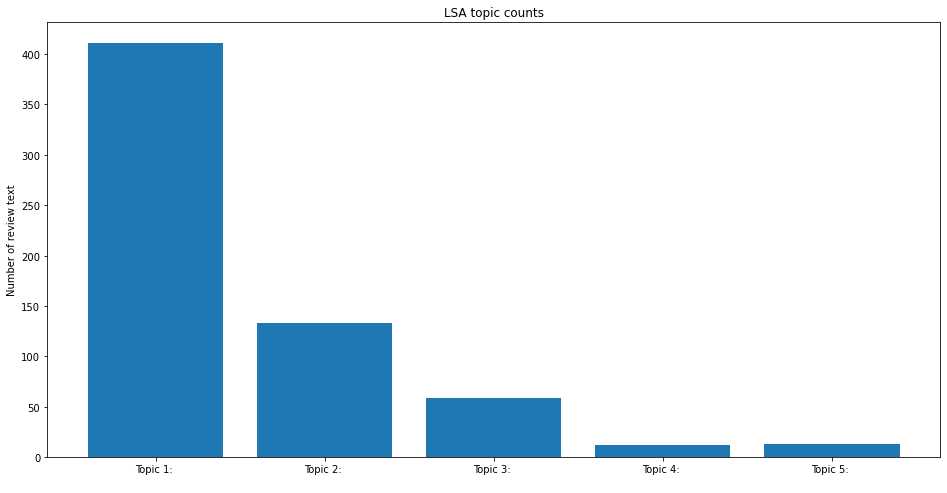

In [149]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i+1) for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [196]:

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 628 samples in 0.003s...
[t-SNE] Computed neighbors for 628 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 628 / 628
[t-SNE] Mean sigma: 0.064063
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.176498
[t-SNE] KL divergence after 2000 iterations: 0.210542


In [132]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [133]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]


In [134]:
top_3_words_lsa = get_top_n_words(4, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

AttributeError: 'int' object has no attribute 'toarray'

AttributeError: 'int' object has no attribute 'toarray'